<a href="https://colab.research.google.com/github/Trivenimuppalla28/HDS5210_InClassTriveni/blob/master/Final/final_project_triveni_HDS_5210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Patient Data Analysis and Visualization**

# *Data Access and Formats*

**project introduction**

The Diabetes.csv dataset serves as a vital resource for analyzing patient records, containing medical data relevant to understanding diabetes and its associated factors. This dataset provides an opportunity to delve into health trends, such as the prevalence of diabetes over time or among specific demographics, and identify risk factors that contribute to the onset or progression of the condition

This project emphasizes the application of data science methodologies to address critical healthcare challenges, particularly those related to diabetes management and prevention. By leveraging powerful Python libraries such as Pandas, the project efficiently handles and preprocesses large volumes of data. Tools like Matplotlib and Seaborn are utilized to create visualizations that simplify complex relationships, making the insights accessible and actionable for stakeholders.




In [103]:
# Importing necessary libraires

import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

Dataset 1

Diabetes, as a chronic and widespread health condition, demands rigorous analysis to enhance our understanding of its prevalence, underlying risk factors, and potential interventions.The dataset likely includes various demographic, clinical, and lifestyle factors, enabling a holistic approach to the analysis.which appears to contain metadata, adds valuable context. Metadata is essential for providing clarity regarding data definitions, relationships, and attributes, ensuring that the analysis remains accurate and grounded in the data's intent.

 Together, these resources serve as a foundation for conducting an in-depth exploration of diabetes-related trends, risk factors, and treatment outcomes.



In [104]:
# Getting Data from local file

diabetes_df = pd.read_csv("/content/Diabetes.csv")

In [105]:
diabetes_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [106]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [107]:
# Getting data from internet

url = "https://www.dropbox.com/scl/fi/utruplejgnwyiq4qllyxf/Appointment.xlsx?rlkey=3ctsjs79chkhr9mwyfyqgtsfc&st=ejqpwqvd&dl=1"
response = requests.get(url)
excel_data = BytesIO(response.content)
appointment_df = pd.read_excel(excel_data)


In [108]:
appointment_df.head()

,Id,AppointmentID,ScheduledDay,AppointmentDay,Date.diff,Gender
0,1,5642903,2016-04-29,2016-04-29,0,F
1,2,5642503,2016-04-29,2016-04-29,0,M
2,3,5642549,2016-04-29,2016-04-29,0,F
3,4,5642828,2016-04-29,2016-04-29,0,F
4,5,5642494,2016-04-29,2016-04-29,0,F


In [109]:
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              2768 non-null   int64         
 1   AppointmentID   2768 non-null   int64         
 2   ScheduledDay    2768 non-null   datetime64[ns]
 3   AppointmentDay  2768 non-null   datetime64[ns]
 4   Date.diff       2768 non-null   int64         
 5   Gender          2768 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 129.9+ KB


In [110]:
# Use of JSON data

df = pd.read_json('/content/status.json')
status_df = pd.json_normalize(df['DATA'])

In [111]:
print(status_df.head())

   Id  Scholarship  Hipertension  Alcoholism  Handcap  SMS_received  Showed_up
0   1        False          True       False    False         False       True
1   2        False         False       False    False         False       True
2   3        False         False       False    False         False       True
3   4        False         False       False    False         False       True
4   5        False          True       False    False         False       True


In [112]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            2768 non-null   int64
 1   Scholarship   2768 non-null   bool 
 2   Hipertension  2768 non-null   bool 
 3   Alcoholism    2768 non-null   bool 
 4   Handcap       2768 non-null   bool 
 5   SMS_received  2768 non-null   bool 
 6   Showed_up     2768 non-null   bool 
dtypes: bool(6), int64(1)
memory usage: 38.0 KB


# Data Merging

# Merging 1

In [113]:
# Merging 1

def join_diabetes_appointment_data(diabetes_df, appointment_df):

    """
    Joins the diabetes data with appointment data based on the Id.

    Arguments:
    diabetes_df: DataFrame containing diabetes-related information
    appointment_df: DataFrame containing appointment details

    Returns:
    Merged DataFrame containing both diabetes and appointment data.
    """

    try:

        # Merging diabetes data with appointment data on 'Id'
        merged_df = pd.merge(diabetes_df, appointment_df, on='Id', how='inner')

        # Checking the first few rows of the merged data
        print("Test passed: diabetes data and appointment data joined successfully based on Id.")
        return merged_df

    except Exception as e:
        print(f"Test failed: {e}")

# Merging diabetes_df with appointment_df
merged_diabetes_appointments_df = join_diabetes_appointment_data(diabetes_df, appointment_df)
merged_diabetes_appointments_df.head()


Test passed: diabetes data and appointment data joined successfully based on Id.


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AppointmentID,ScheduledDay,AppointmentDay,Date.diff,Gender
0,1,6,148,72,35,0,33.6,0.627,50,1,5642903,2016-04-29,2016-04-29,0,F
1,2,1,85,66,29,0,26.6,0.351,31,0,5642503,2016-04-29,2016-04-29,0,M
2,3,8,183,64,0,0,23.3,0.672,32,1,5642549,2016-04-29,2016-04-29,0,F
3,4,1,89,66,23,94,28.1,0.167,21,0,5642828,2016-04-29,2016-04-29,0,F
4,5,0,137,40,35,168,43.1,2.288,33,1,5642494,2016-04-29,2016-04-29,0,F


This step involves merging the **diabetes dataset** with the **appointment dataset** using the common key `Id`. The `join_diabetes_appointment_data` function combines details from both datasets, resulting in a unified DataFrame that contains patient-level information about their medical and appointment details.

By integrating these datasets, the analysis can now explore relationships between diabetes-related metrics (e.g., glucose levels, BMI) and appointment behaviors (e.g., attendance, scheduling gaps). This combined dataset enables comprehensive analyses such as evaluating whether certain diabetes characteristics influence appointment adherence or identifying patterns in healthcare utilization among diabetic patients.

# Merging 2

In [114]:
# Merging 2

def join_diabetes_appointment_status_data(merged_diabetes_appointments_df, status_df):

    """
    Joins the merged diabetes and appointment data with status data based on the Id.

    Arguments:
    merged_diabetes_appointments_df: Merged DataFrame from diabetes and appointment data
    status_df: DataFrame containing patient status information

    Returns:
    Final merged DataFrame containing diabetes, appointment, and status data.
    """

    try:

        # Merging the diabetes-appointment data with status data on 'Id'
        final_merged_df = pd.merge(merged_diabetes_appointments_df, status_df, on='Id', how='inner')

        # Checking the first few rows of the final merged data
        print("Test passed: merged diabetes, appointment, and status data successfully.")
        return final_merged_df

    except Exception as e:
        print(f"Test failed: {e}")

# Merging the data with status_df
final_merged_df = join_diabetes_appointment_status_data(merged_diabetes_appointments_df, status_df)

final_merged_df.head()

Test passed: merged diabetes, appointment, and status data successfully.


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,...,ScheduledDay,AppointmentDay,Date.diff,Gender,Scholarship,Hipertension,Alcoholism,Handcap,SMS_received,Showed_up
0,1,6,148,72,35,0,33.6,0.627,50,1,...,2016-04-29,2016-04-29,0,F,False,True,False,False,False,True
1,2,1,85,66,29,0,26.6,0.351,31,0,...,2016-04-29,2016-04-29,0,M,False,False,False,False,False,True
2,3,8,183,64,0,0,23.3,0.672,32,1,...,2016-04-29,2016-04-29,0,F,False,False,False,False,False,True
3,4,1,89,66,23,94,28.1,0.167,21,0,...,2016-04-29,2016-04-29,0,F,False,False,False,False,False,True
4,5,0,137,40,35,168,43.1,2.288,33,1,...,2016-04-29,2016-04-29,0,F,False,True,False,False,False,True


This step involves merging the already combined **diabetes and appointment dataset** with the **status dataset** using the common key `Id`. The `join_diabetes_appointment_status_data` function consolidates patient-level information, including medical data, appointment details, and status indicators (e.g., scholarship, hypertension, alcoholism).

This final merged dataset integrates all relevant patient information into a single structure, enabling comprehensive analyses. For example, it can now be used to study how diabetes metrics and appointment behaviors correlate with patient statuses, such as attendance or health conditions. This streamlined dataset supports in-depth exploration of factors influencing patient outcomes and healthcare utilization.

# Data Aggregation and Pivoting

# Aggregation 1

In [115]:
# Aggregation 1

def aggregate_bmi_by_outcome(df):

    """
    Aggregates the average BMI by Outcome (1 for diabetes, 0 for no diabetes).

    Arguments:
    df: DataFrame containing diabetes, appointment, and status data.

    Returns:
    DataFrame with average BMI aggregated by Outcome.
    """

    try:
        # Aggregating average BMI by 'Outcome'
        bmi_by_outcome = df.groupby('Outcome')['BMI'].mean().reset_index()

        # Sorting by BMI for better visualization
        bmi_by_outcome = bmi_by_outcome.sort_values(by='BMI', ascending=False)

        print("Aggregation Test passed: Average BMI aggregated by Outcome successfully.")

        return bmi_by_outcome

    except Exception as e:
        print(f"Test failed: {e}")

# Aggregation: Average BMI by Outcome (Diabetic vs Non-Diabetic)
bmi_by_outcome = aggregate_bmi_by_outcome(final_merged_df)
print("\nAverage BMI by Outcome (Diabetic vs Non-Diabetic):")
print(bmi_by_outcome)

Aggregation Test passed: Average BMI aggregated by Outcome successfully.

Average BMI by Outcome (Diabetic vs Non-Diabetic):
   Outcome        BMI
1        1  35.270378
0        0  30.494989


This step involves **aggregating the average BMI** for patients based on their diabetes outcome (`Outcome`), where `1` indicates diabetic and `0` indicates non-diabetic. The `aggregate_bmi_by_outcome` function calculates the mean BMI for each group, providing insights into the relationship between BMI and diabetes.

The results are sorted by BMI for better readability and visualization, highlighting how BMI levels differ between diabetic and non-diabetic patients. This aggregation is crucial for understanding the role of BMI as a potential risk factor for diabetes and for identifying trends that could guide targeted interventions or preventive measures.

# Aggregation 2

In [116]:
# Aggregation 2

def aggregate_appointments_by_gender(df):

    """
    Aggregates the total number of appointments by Gender.

    Arguments:
    df: DataFrame containing diabetes, appointment, and status data.

    Returns:
    DataFrame with total appointments aggregated by Gender.
    """

    try:
        # Aggregating the number of appointments by 'Gender'
        appointments_by_gender = df.groupby('Gender')['AppointmentID'].count().reset_index()

        # Sorting the result for better readability
        appointments_by_gender = appointments_by_gender.sort_values(by='AppointmentID', ascending=False)

        print("Aggregation Test passed: Total appointments aggregated by Gender successfully.")
        return appointments_by_gender

    except Exception as e:
        print(f"Test failed: {e}")

# Aggregation: Total Appointments by Gender (Male vs Female)
appointments_by_gender = aggregate_appointments_by_gender(final_merged_df)
print("\nTotal Appointments by Gender (Male vs Female):")
print(appointments_by_gender)

Aggregation Test passed: Total appointments aggregated by Gender successfully.

Total Appointments by Gender (Male vs Female):
  Gender  AppointmentID
0      F           1840
1      M            928


This step involves **aggregating the total number of appointments** for each gender to understand the distribution of healthcare utilization. The `aggregate_appointments_by_gender` function counts the total appointments (`AppointmentID`) grouped by the `Gender` column.

By sorting the results in descending order, the function highlights which gender has a higher frequency of appointments. This aggregation provides valuable insights into gender-based healthcare behavior, potentially revealing patterns in appointment adherence or access to medical services. Such information can guide gender-specific interventions to improve healthcare outcomes and equity.

# Pivoting 1


In [117]:
# Pivoting 1

def pivot_bmi_by_outcome_gender(df):

    """
    Pivots the average BMI by Outcome (Diabetic vs Non-Diabetic) and Gender.

    Arguments:
    df: DataFrame containing diabetes, appointment, and status data.

    Returns:
    Pivoted DataFrame with Outcome as rows and Gender as columns, showing average BMI.
    """

    try:

        # Pivoting the data to show average BMI for each Outcome and Gender
        pivoted_bmi = df.pivot_table(values='BMI',
                                     index='Outcome',
                                     columns='Gender',
                                     aggfunc='mean',
                                     fill_value=0)

        print("Pivot Test passed: Average BMI pivoted by Outcome and Gender successfully.")
        return pivoted_bmi

    except Exception as e:
        print(f"Test failed: {e}")

# Pivoting: Average BMI by Outcome and Gender
pivoted_bmi_by_outcome_gender = pivot_bmi_by_outcome_gender(final_merged_df)
print("\nPivoted Average BMI by Outcome and Gender:")
print(pivoted_bmi_by_outcome_gender)

Pivot Test passed: Average BMI pivoted by Outcome and Gender successfully.

Pivoted Average BMI by Outcome and Gender:
Gender           F          M
Outcome                      
0        30.632375  30.215860
1        35.269663  35.271733


This step involves **pivoting the average BMI** data to display it by diabetes `Outcome` (Diabetic vs. Non-Diabetic) and `Gender` (Male vs. Female). The `pivot_bmi_by_outcome_gender` function organizes the data into a table where the rows represent the `Outcome`, and the columns represent the `Gender`.

The resulting pivot table shows the average BMI for each combination of `Outcome` and `Gender`, with missing values filled as `0`. This structured view provides a clear comparison of BMI trends across different genders and diabetes statuses, enabling deeper insights into how gender and BMI correlate with the risk of diabetes. Such visualizations aid in identifying high-risk groups and tailoring healthcare interventions effectively.

# Pivoting 2

In [118]:
# Pivoting 2

def pivot_appointments_by_outcome_gender(df):

    """
    Pivots the total number of appointments by Outcome (Diabetic vs Non-Diabetic) and Gender.

    Arguments:
    df: DataFrame containing diabetes, appointment, and status data.

    Returns:
    Pivoted DataFrame with Outcome as rows and Gender as columns, showing total appointments.
    """

    try:

        # Pivoting the data to show the count of appointments for each Outcome and Gender
        pivoted_appointments = df.pivot_table(values='AppointmentID',
                                              index='Outcome',
                                              columns='Gender',
                                              aggfunc='count',
                                              fill_value=0)

        print("Pivot Test passed: Total appointments pivoted by Outcome and Gender successfully.")
        return pivoted_appointments

    except Exception as e:
        print(f"Test failed: {e}")


# Pivoting: Total Appointments by Outcome and Gender
pivoted_appointments_by_outcome_gender = pivot_appointments_by_outcome_gender(final_merged_df)
print("\nPivoted Total Appointments by Outcome and Gender:")
print(pivoted_appointments_by_outcome_gender)

Pivot Test passed: Total appointments pivoted by Outcome and Gender successfully.

Pivoted Total Appointments by Outcome and Gender:
Gender      F    M
Outcome           
0        1217  599
1         623  329


This step involves **pivoting the total number of appointments** to display them by diabetes `Outcome` (Diabetic vs. Non-Diabetic) and `Gender` (Male vs. Female). The `pivot_appointments_by_outcome_gender` function creates a table where rows represent the `Outcome` and columns represent the `Gender`.

The pivot table shows the total number of appointments for each `Outcome` and `Gender` combination, with missing values filled as `0`. This transformation provides a clear comparison of appointment attendance trends across genders and diabetes statuses. It highlights variations in healthcare utilization patterns, aiding in identifying groups that may require targeted interventions to improve appointment adherence or access to care.

# Data Transformation

# Transformation 1

In [119]:
# Transformation 1

def create_age_group(df):

    """
    Creates a new 'Age Group' column based on the 'Age' column.

    Categories:
    'Young' (<=18),
    'Adult' (19-60),
    'Senior' (>60)
    """

    try:

        def categorize_age(age):
            if age <= 18:
                return 'Young'
            elif 19 <= age <= 60:
                return 'Adult'
            else:
                return 'Senior'

        df['Age Group'] = df['Age'].apply(categorize_age)
        print("test passed: 'Age Group' column added successfully.")

        return df

    except Exception as e:
        print(f"Error in Transformation 1: {e}")

# Apply the transformation and view the result
try:
    final_merged_df = create_age_group(final_merged_df)
    print("\nAfter Transformation 1 - Age Group Added:")
    print(final_merged_df[['Age', 'Age Group']].head())
except Exception as e:
    print(f"Error applying Transformation 1: {e}")



test passed: 'Age Group' column added successfully.

After Transformation 1 - Age Group Added:
   Age Age Group
0   50     Adult
1   31     Adult
2   32     Adult
3   21     Adult
4   33     Adult


This transformation involves creating a new column, **'Age Group'**, to categorize patients based on their age into three groups: **'Young' (≤18 years)**, **'Adult' (19–60 years)**, and **'Senior' (>60 years)**. The categorization is achieved using a helper function applied to the `Age` column.

This transformation simplifies demographic analysis by grouping patients into meaningful age categories. It enables insights into age-specific patterns in healthcare utilization, medical conditions, and outcomes, providing valuable information for targeted healthcare interventions and resource allocation.

# Transformation 2

In [120]:
# Transformation 2

def categorize_bmi(df):

    """
    Creates a new 'BMI Category' column based on the 'BMI' column.

    Categories:
    'Underweight' (< 18.5),
    'Normal' (18.5 - 24.9),
    'Overweight' (25 - 29.9),
    'Obese' (>= 30)
    """

    try:

        def bmi_category(bmi):
            if bmi < 18.5:
                return 'Underweight'
            elif 18.5 <= bmi < 24.9:
                return 'Normal'
            elif 25 <= bmi < 29.9:
                return 'Overweight'
            else:
                return 'Obese'

        df['BMI Category'] = df['BMI'].apply(bmi_category)
        print("test passed: 'BMI Category' column added successfully.")

        return df

    except Exception as e:
        print(f"Error in Transformation 2: {e}")

# Apply the transformation and view the result
try:
    final_merged_df = categorize_bmi(final_merged_df)
    print("\nAfter Transformation 2 - BMI Category Added:")
    print(final_merged_df[['BMI', 'BMI Category']].head())
except Exception as e:
    print(f"Error applying Transformation 2: {e}")



test passed: 'BMI Category' column added successfully.

After Transformation 2 - BMI Category Added:
    BMI BMI Category
0  33.6        Obese
1  26.6   Overweight
2  23.3       Normal
3  28.1   Overweight
4  43.1        Obese


This transformation creates a new column, **'BMI Category'**, which classifies patients based on their Body Mass Index (BMI) into four categories: **'Underweight' (< 18.5)**, **'Normal' (18.5–24.9)**, **'Overweight' (25–29.9)**, and **'Obese' (≥ 30)**. The categorization is applied using a helper function that evaluates each patient's BMI.

This transformation provides a simplified way to analyze trends and patterns related to body weight and its impact on health outcomes. By grouping patients into distinct BMI categories, it enables targeted studies on the prevalence of conditions like diabetes or hypertension across different weight groups and helps inform weight-management strategies in healthcare planning.

# Transformation 3

In [121]:
# Transformation 3

def categorize_appointment_status(df):

    """
    Creates a new 'Appointment Status' column based on the 'Showed_up' column.

    'Showed_up' -> 'Attended',
    'Not Showed Up' -> 'Missed'.
    """

    try:

        df['Appointment Status'] = df['Showed_up'].apply(lambda x: 'Attended' if x else 'Missed')
        print("test passed: 'Appointment Status' column added successfully.")

        return df

    except Exception as e:
        print(f"Error in Transformation 3: {e}")


# Apply the transformation and view the result
try:
    final_merged_df = categorize_appointment_status(final_merged_df)
    print("\nAfter Transformation 3 - Appointment Status Added:")
    print(final_merged_df[['Showed_up', 'Appointment Status']].head())

except Exception as e:
    print(f"Error applying Transformation 3: {e}")



test passed: 'Appointment Status' column added successfully.

After Transformation 3 - Appointment Status Added:
   Showed_up Appointment Status
0       True           Attended
1       True           Attended
2       True           Attended
3       True           Attended
4       True           Attended


This transformation adds a new column, **'Appointment Status'**, to categorize patients based on their appointment attendance. The `Showed_up` column is evaluated, and patients are labeled as **'Attended'** if they showed up for their appointment or **'Missed'** if they did not.

This transformation simplifies the analysis of appointment behavior, making it easier to identify trends in attendance. It provides valuable insights into factors influencing appointment adherence, which can help improve scheduling systems and design interventions to reduce missed appointments. This categorization also aids in studying the correlation between appointment attendance and medical outcomes.

# Transformation 4

In [122]:
# Transformation 4

def categorize_glucose(df):

    """
    Creates a new 'Glucose Category' column based on the 'Glucose' column.

    Categories: 'Normal' (< 100),
    'Prediabetes' (100 - 125),
    'Diabetes' (>= 126)
    """

    try:

        def glucose_category(glucose):
            if glucose < 100:
                return 'Normal'
            elif 100 <= glucose <= 125:
                return 'Prediabetes'
            else:
                return 'Diabetes'

        df['Glucose Category'] = df['Glucose'].apply(glucose_category)
        print("test passed: 'Glucose Category' column added successfully.")

        return df

    except Exception as e:
        print(f"Error in Transformation 4: {e}")

# Apply the transformation and view the result
try:
    final_merged_df = categorize_glucose(final_merged_df)
    print("\nAfter Transformation 4 - Glucose Category Added:")
    print(final_merged_df[['Glucose', 'Glucose Category']].head())

except Exception as e:
    print(f"Error applying Transformation 4: {e}")



test passed: 'Glucose Category' column added successfully.

After Transformation 4 - Glucose Category Added:
   Glucose Glucose Category
0      148         Diabetes
1       85           Normal
2      183         Diabetes
3       89           Normal
4      137         Diabetes


This transformation adds a new column, **'Glucose Category'**, to classify patients based on their blood glucose levels into three categories: **'Normal' (< 100)**, **'Prediabetes' (100–125)**, and **'Diabetes' (≥ 126)**. The categorization is applied using a helper function that evaluates the `Glucose` column.

This transformation helps in identifying and analyzing patterns related to blood glucose levels and their association with health outcomes such as diabetes. It simplifies the understanding of glucose trends across the population and provides a basis for targeted interventions and early diagnosis, especially for individuals in the 'Prediabetes' category who are at high risk of developing diabetes.

# Transformation 5

In [123]:
# Transformation 5

def create_age_outcome_interaction(df):

    """
    Creates a new interaction feature combining 'Age Group' and 'Outcome'.
    """

    try:

        df['Age-Outcome Interaction'] = df['Age Group'] + ' - ' + df['Outcome'].astype(str)
        print("test passed: 'Age-Outcome Interaction' column added successfully.")

        return df

    except Exception as e:
        print(f"Error in Transformation 5: {e}")


# Apply the transformation and view the result
try:
    final_merged_df = create_age_outcome_interaction(final_merged_df)
    print("\nAfter Transformation 5 - Age-Outcome Interaction Added:")
    print(final_merged_df[['Age Group', 'Outcome', 'Age-Outcome Interaction']].head())

except Exception as e:
    print(f"Error applying Transformation 5: {e}")



test passed: 'Age-Outcome Interaction' column added successfully.

After Transformation 5 - Age-Outcome Interaction Added:
  Age Group  Outcome Age-Outcome Interaction
0     Adult        1               Adult - 1
1     Adult        0               Adult - 0
2     Adult        1               Adult - 1
3     Adult        0               Adult - 0
4     Adult        1               Adult - 1


This transformation creates a new column, **'Age-Outcome Interaction'**, which combines the `Age Group` (Young, Adult, Senior) and `Outcome` (Diabetic or Non-Diabetic) into a single feature. This interaction feature is generated by concatenating the `Age Group` and the string representation of the `Outcome` column.

This new feature is valuable for deeper insights into how age demographics interact with diabetes outcomes. It simplifies demographic and condition-specific analysis, helping to identify trends such as which age groups are more prone to diabetes. The interaction feature can also serve as an input for predictive models to enhance their ability to capture demographic-disease relationships.

# Data Visualization

# Visualization 1

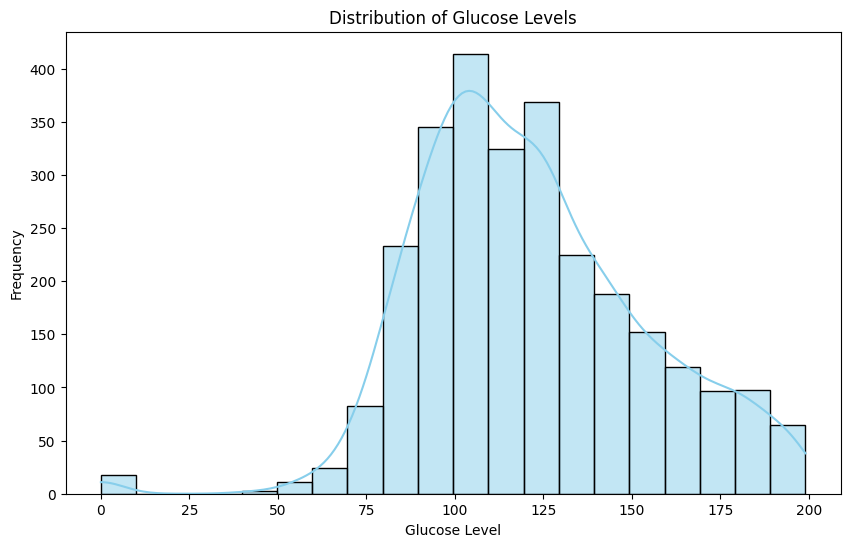

test passed: Glucose Distribution plotted successfully.


In [124]:
# Visualization 1

def plot_glucose_distribution(df):

    """
    Plots a histogram showing the distribution of glucose levels in the dataset.
    """

    try:
        plt.figure(figsize=(10, 6))
        sns.histplot(df['Glucose'], bins=20, kde=True, color='skyblue', edgecolor='black')
        plt.title('Distribution of Glucose Levels')
        plt.xlabel('Glucose Level')
        plt.ylabel('Frequency')
        plt.show()
        print("test passed: Glucose Distribution plotted successfully.")

    except Exception as e:
        print(f"Error in Visualization 1: {e}")


plot_glucose_distribution(final_merged_df)

The histogram above illustrates the distribution of glucose levels in the patient dataset. The distribution has a prominent peak around the 100–125 range, indicating that most individuals in the dataset have glucose levels within this range, which typically corresponds to normal to prediabetic glucose levels. The distribution displays a right-skewed pattern, with a longer tail extending toward higher glucose levels, suggesting that a smaller subset of patients has significantly elevated glucose levels, likely corresponding to diabetic patients.

On the lower end of the glucose spectrum, a few patients are observed with glucose levels close to 0, which might be indicative of data anomalies or missing values improperly coded as zero. The overall decline in the frequency of glucose levels after 150 demonstrates that fewer individuals fall into the severe diabetes range.

The use of a Kernel Density Estimate (KDE) overlay provides a smooth curve to highlight the central tendency and spread of the glucose levels in the dataset, making the distribution pattern clearer.

A large portion of the dataset comprises individuals with glucose levels in the normal to prediabetic range (100–125), with fewer patients falling into the diabetic range (above 150).
Patients with very low glucose levels (close to 0) may represent data anomalies that require investigation and correction.
The right-skewed nature of the distribution suggests that there is a smaller subset of high-glucose-level patients who could be the focus for detailed analysis.
This plot provides a strong foundation for exploring the relationship between glucose levels and key variables such as diabetes outcome, BMI, and age group to understand the factors driving elevated glucose levels.

# Visualization 2

<ipython-input-125-143b4ceb601e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_count.index, y=bmi_count.values, palette='viridis')


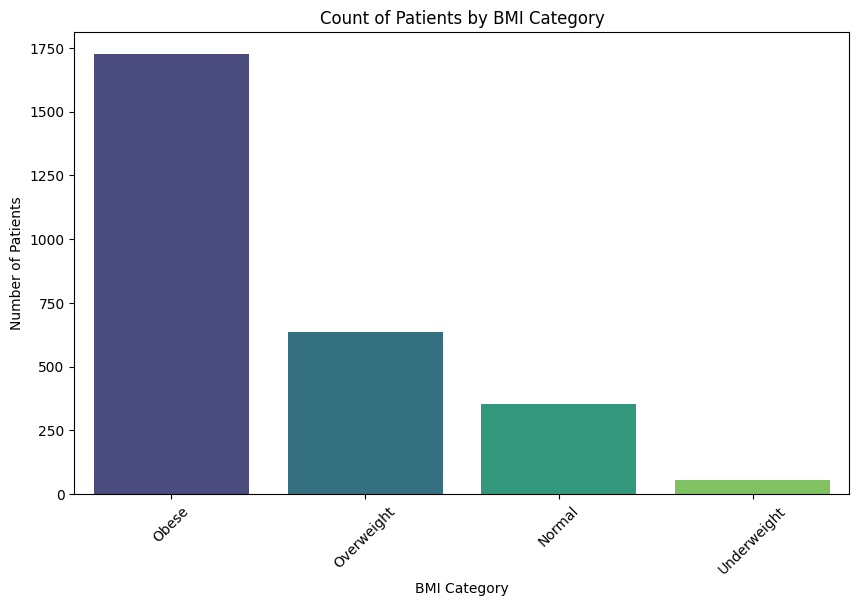

test passed: BMI Category count plotted successfully.


In [125]:
# Visualization 2

def plot_bmi_category_count(df):

    """
    Plots a bar chart showing the count of patients in each BMI Category.
    """

    try:

        plt.figure(figsize=(10, 6))
        bmi_count = df['BMI Category'].value_counts()
        sns.barplot(x=bmi_count.index, y=bmi_count.values, palette='viridis')
        plt.title('Count of Patients by BMI Category')
        plt.xlabel('BMI Category')
        plt.ylabel('Number of Patients')
        plt.xticks(rotation=45)
        plt.show()
        print("test passed: BMI Category count plotted successfully.")

    except Exception as e:
        print(f"Error in Visualization 2: {e}")

# Apply the function and show the result
try:
    plot_bmi_category_count(final_merged_df)
except Exception as e:
    print(f"Error applying Visualization 2: {e}")


The bar chart above illustrates the count of patients across different BMI categories, including Obese, Overweight, Normal, and Underweight. A significant proportion of patients fall into the Obese category, accounting for the majority of individuals in the dataset. This is followed by the Overweight category, which also constitutes a considerable number of patients. The Normal BMI category shows a much smaller count, and the Underweight category represents the smallest group in the dataset.

This distribution suggests that the dataset predominantly includes individuals with higher BMI values, which may indicate a population at higher risk for conditions such as type 2 diabetes and cardiovascular diseases. The relatively small number of individuals with normal or underweight BMI further emphasizes the focus on individuals who may already exhibit risk factors related to obesity.

Obesity is the dominant BMI category, highlighting the prevalence of higher BMI levels in the dataset. This is consistent with the association of obesity as a primary risk factor for type 2 diabetes.
The significant count of patients in the Overweight category suggests that this group is also at a heightened risk of developing diabetes and related health issues if not managed effectively.
The Normal and Underweight groups are underrepresented, suggesting that the dataset may be focused on a population already at risk due to elevated BMI levels.
The chart underscores the need to focus on interventions targeted at obesity management to reduce the associated health risks in the population.

# Visualization 3

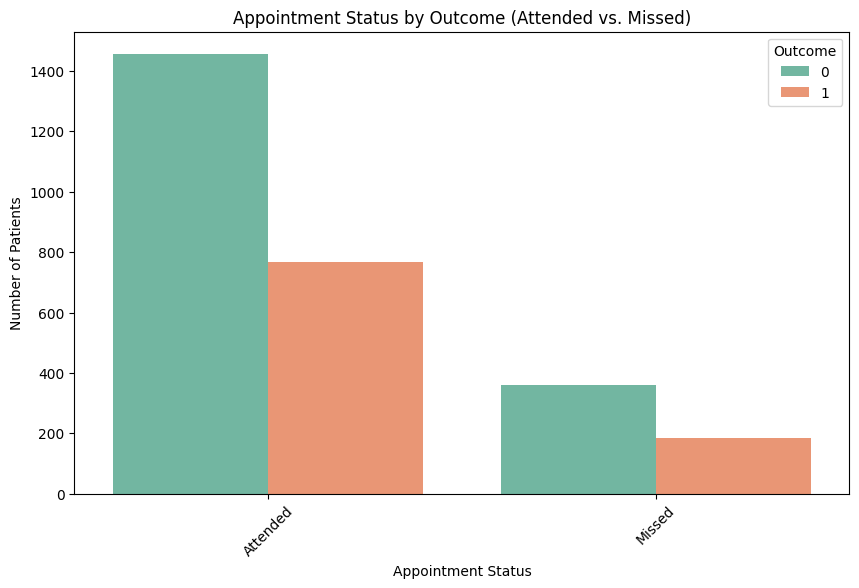

test passed: Appointment Status by Outcome plotted successfully.


In [126]:
# Visualization 3

def plot_appointment_status_by_outcome(df):

    """
    Plots a count plot showing the number of attended vs missed appointments by Outcome.
    """

    try:

        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Appointment Status', hue='Outcome', palette='Set2')
        plt.title('Appointment Status by Outcome (Attended vs. Missed)')
        plt.xlabel('Appointment Status')
        plt.ylabel('Number of Patients')
        plt.xticks(rotation=45)
        plt.show()
        print("test passed: Appointment Status by Outcome plotted successfully.")

    except Exception as e:
        print(f"Error in Visualization 3: {e}")

try:
    plot_appointment_status_by_outcome(final_merged_df)

except Exception as e:
    print(f"Error applying Visualization 3: {e}")


The bar chart above illustrates the appointment status (attended or missed) of patients, segmented by their diabetes outcome (0: No Diabetes, 1: Diabetes). The chart provides a comparative view of how appointment attendance differs between diabetic and non-diabetic individuals.

**Attended Appointments:**

A majority of both non-diabetic (Outcome = 0) and diabetic (Outcome = 1) patients attended their scheduled appointments.
Non-diabetic patients show a higher attendance count compared to diabetic patients, indicating better adherence to scheduled visits.


**Missed Appointments:**

A smaller but significant proportion of both groups missed their appointments.
Non-diabetic patients missed fewer appointments compared to diabetic patients, suggesting a possible trend where diabetic individuals may have slightly lower adherence to scheduled visits.


**Proportion:**

While the total number of non-diabetic patients attending and missing appointments is higher, the proportion of missed appointments among diabetics might warrant further investigation to understand potential barriers.


Non-diabetic patients exhibit better overall adherence to appointments, possibly due to fewer health complications or better management of their schedules.
Diabetic patients, while attending appointments in significant numbers, have a higher proportion of missed appointments, potentially due to barriers like physical health challenges, transportation issues, or lack of follow-up.
Understanding the reasons for missed appointments among diabetics could provide actionable insights to improve appointment adherence and overall diabetes management.

# Conclusion

This project provided a comprehensive analysis of diabetes-related data by merging and visualizing patient, appointment, and medical status information. Through various transformations and visualizations, key insights were derived about the relationships between critical variables such as glucose levels, BMI, appointment attendance, and diabetes outcomes.

The glucose distribution analysis revealed that most patients fall within the normal to prediabetic range, with fewer individuals exhibiting severely elevated glucose levels. This emphasizes the need for early intervention in borderline cases to prevent the progression of diabetes. Similarly, the BMI analysis showed a significant prevalence of obesity among the patients, reinforcing the well-established link between high BMI and increased diabetes risk.

The analysis of appointment status highlighted that diabetic patients are more likely to miss scheduled appointments compared to non-diabetic individuals. This finding underlines the importance of addressing barriers to healthcare access and adherence for diabetic patients, as regular appointments are critical for effective disease management.

Overall, this project demonstrates how data-driven insights can support better understanding, prevention, and management of diabetes. Future work could focus on predictive modeling using these variables to identify high-risk patients and optimize healthcare strategies.